# Product Recommendations

BUSMGT 7247

## Load libraries and data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('data/purchases.csv')
df.head()

,ID,Age,Gender,Income,Married,Product
0,1,37,Female,62000,No,B
1,2,30,Male,74500,Yes,C
2,3,59,Female,94000,Yes,A
3,4,34,Female,63500,No,B
4,5,37,Female,84000,No,A


### Exercise
Calculate the Manhattan and Euclidean distances, based on age and income, between the first two records

## Numerical representations of categorical data

In [3]:
# Convert Gender and Married to a numerical representation
df = pd.get_dummies(df, columns=['Gender', 'Married'])
df = df.drop(['ID', 'Gender_Male', 'Married_No'], axis=1)
df.head()

,Age,Income,Product,Gender_Female,Married_Yes
0,37,62000,B,1,0
1,30,74500,C,0,1
2,59,94000,A,1,1
3,34,63500,B,1,0
4,37,84000,A,1,0


### Exercise
Calculate the Euclidean distance, based on all variables, between the first two records

## Feature scaling

In [4]:
# Classify Product as a function of the remaining variables (Age, Income, Gender, Married)
# Use the convention that the label is y and the features are X
y = df['Product']
X = df.drop('Product', axis=1)

In [5]:
# Scale the data to be between 0 and 1
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[0.46341463, 0.40865385, 1.        , 0.        ],
       [0.29268293, 0.52884615, 0.        , 1.        ],
       [1.        , 0.71634615, 1.        , 1.        ],
       ...,
       [0.58536585, 0.59615385, 1.        , 0.        ],
       [0.14634146, 0.42788462, 1.        , 1.        ],
       [0.58536585, 0.46634615, 1.        , 0.        ]])

## Train-test splits

In [6]:
# Split data into training and test sets
(X_train, X_test,
 y_train, y_test) = model_selection.train_test_split(X_scaled, y,
                                                     test_size=0.2)

## Fitting a model

In [7]:
# Fit the model on the training data using an arbitrary value of k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# For the training data, record the actual and predicted classes in
# a dataframe for viewing
df_temp = pd.DataFrame({
    'Actual':y_train,
    'Predicted':knn.predict(X_train),
})
df_temp['Match'] = (df_temp['Actual'] == df_temp['Predicted'])
df_temp.head()

,Actual,Predicted,Match
6224,B,B,True
1887,A,A,True
7763,B,B,True
5450,B,B,True
9446,B,B,True


In [9]:
# What percent of instances does the model correctly classify
# for the testing data?
df_temp['Match'].mean()

0.8075

### Exercise
Using the training data, manually try different values of k and record the performance in terms of the percent of correct classifications

### Exercise
Automate the evaluation of k over the interval \[10, 100\]. Find the best value of k in that interval based on the percent of correct classifications for the training data

## Making predictions for new customers

In [10]:
# Input new customers
X_new = [[25, 90000, 1, 0],
        [55, 30000, 1, 0],
        [50, 70000, 1, 1],
        [25, 75000, 0, 0],
        [58, 45000, 0, 0],
        [28, 70000, 0, 1]]

X_new = scaler.transform(np.array(X_new))

# Predict products
knn.predict(X_new)

array(['A', 'B', 'B', 'C', 'C', 'D'], dtype=object)

In [11]:
# Calculate probabilities
knn.predict_proba(X_new)

array([[0.66666667, 0.33333333, 0.        , 0.        ],
       [0.33333333, 0.66666667, 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.33333333],
       [0.        , 0.        , 0.33333333, 0.66666667]])

## Fitting a model with cross-validation

In [12]:
neighbors = list(range(5, 300, 5))

# Cross-validate using a 10-fold approach:
# For each possible value of k, fit the model 10 times,
# randomly leaving out 1/10 of the training data
# to use for performance evaluation
percent_correct = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=10,
                                             scoring='accuracy')
    percent_correct.append(100 * scores.mean())

In [13]:
# Determine the best value of k
k_best = neighbors[np.argmax(percent_correct)]
k_best

60

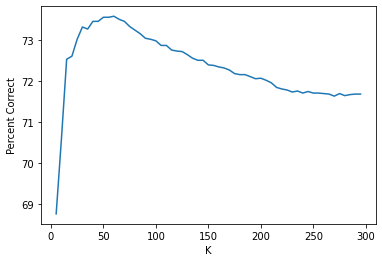

In [14]:
# Plot percent correct vs. k
plt.plot(neighbors, percent_correct)
plt.xlabel('K')
plt.ylabel('Percent Correct')
plt.show()

In [15]:
# Fit the model for the best value of k
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)

# Predict outcomes
y_pred = knn.predict(X_test)

# Get accuracy (percent of correct labels) on test data
metrics.accuracy_score(y_test, y_pred)

0.7425

### Exercise
Why might the optimal value of k vary when you run this notebook repeatedly?

### Exercise
Summarize the model's performance with a confusion matrix.